<a href="https://colab.research.google.com/github/deepakgoswami7/DEEPAK-GOSWAMI-CS-2023-B-ID-19/blob/main/DIABETES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
dataset = pd.read_csv(r'/content/diabetes.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


([<matplotlib.axis.YTick at 0x7ff27375fa90>,
 [Text(0, 0, 'Pregnancies'),
  Text(0, 0, 'Glucose'),
  Text(0, 0, 'BloodPressure'),
  Text(0, 0, 'SkinThickness'),
  Text(0, 0, 'Insulin'),
  Text(0, 0, 'BMI'),
  Text(0, 0, 'DiabetesPedigreeFunction'),
  Text(0, 0, 'Age'),
  Text(0, 0, 'Outcome')])

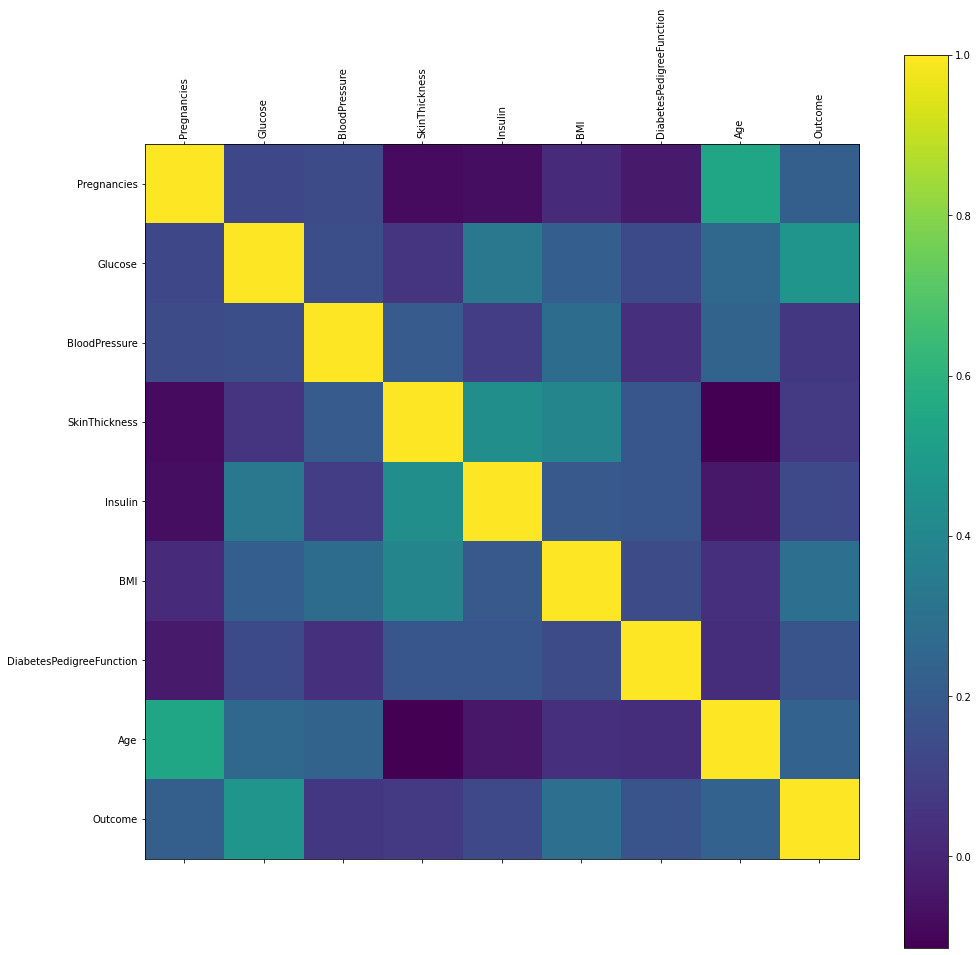

In [ ]:
rcParams['figure.figsize'] = 16, 16
plt.matshow(dataset.corr())
plt.colorbar()
plt.xticks(np.arange(dataset.shape[1]), dataset.columns, rotation = 'vertical')
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)

In [ ]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff273189390>,
      dtype=object)

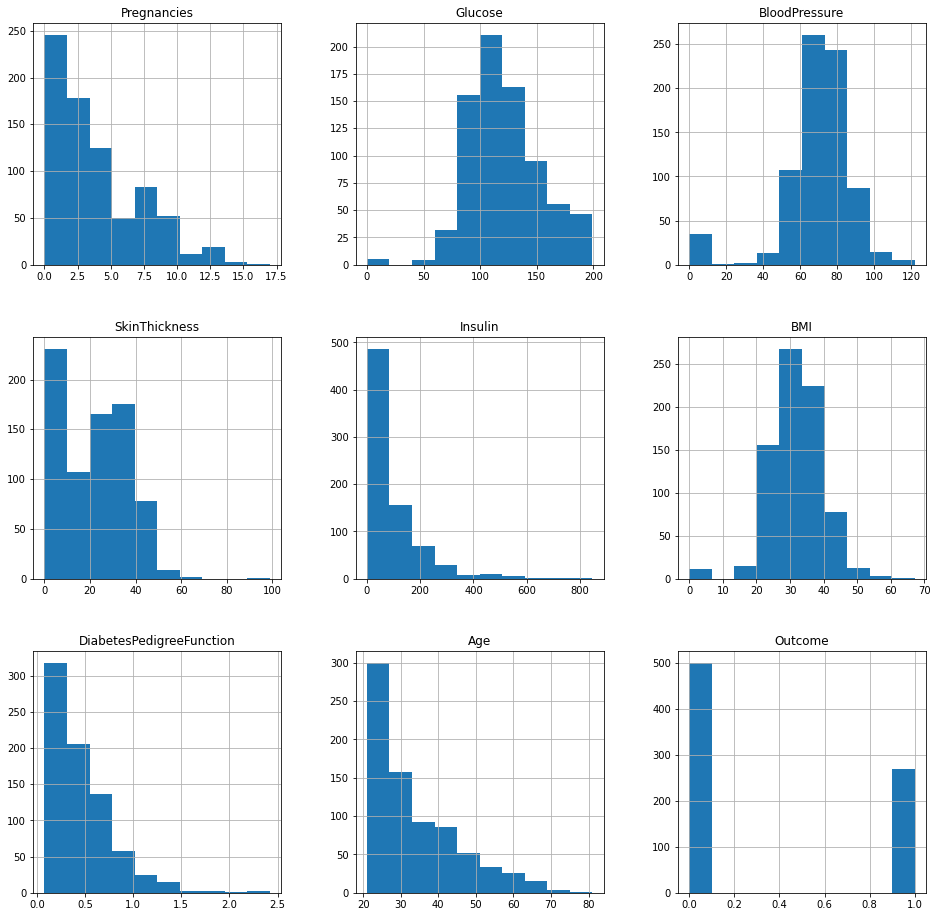

In [ ]:
dataset.hist()

In [ ]:
StdSclr = StandardScaler()
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
dataset[columns] = StdSclr.fit_transform(dataset[columns])

In [ ]:
y = dataset['Outcome']
x = dataset.drop(['Outcome'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.26, random_state = 1)

In [ ]:
#LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print('Accuracy = {}'.format(round(100*LR_model.score(x_test, y_test), 2)))

Accuracy = 78.0


In [ ]:
#K-Neighbours
knn_score_lst = []
for i in range(4, 10):    
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    knn_score_lst.append(round(100*knn_model.score(x_test, y_test),2))

In [ ]:
print(knn_score_lst)

[70.0, 72.5, 73.5, 75.5, 73.0, 74.0]


([<matplotlib.axis.XTick at 0x7ff272c987d0>,
 <a list of 6 Text major ticklabel objects>)

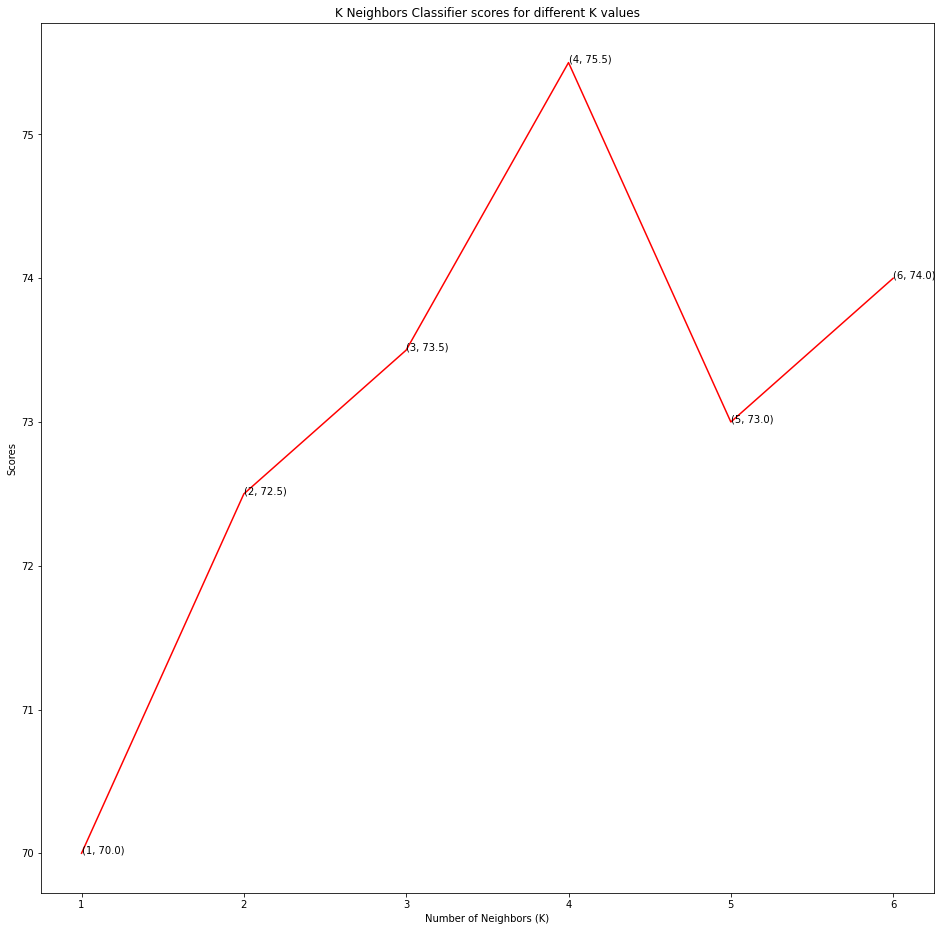

In [ ]:
plt.plot([ i for i in range(1, 7)], knn_score_lst, color = 'red')
for i in range(1, 7):
    plt.text( i, knn_score_lst[i-1], (i, knn_score_lst[i-1]))
plt.title('K Neighbors Classifier scores for different K values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.xticks([i for i in range( 1, 7)])

In [ ]:
#decision tree

decision_tree_score_lst = []
for i in range(1, len(x.columns) + 1):
    dt_model = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_model.fit(x_train, y_train)
    decision_tree_score_lst.append(round(100*dt_model.score(x_test, y_test), 2))

([<matplotlib.axis.XTick at 0x7ff272bf1a10>,
 <a list of 8 Text major ticklabel objects>)

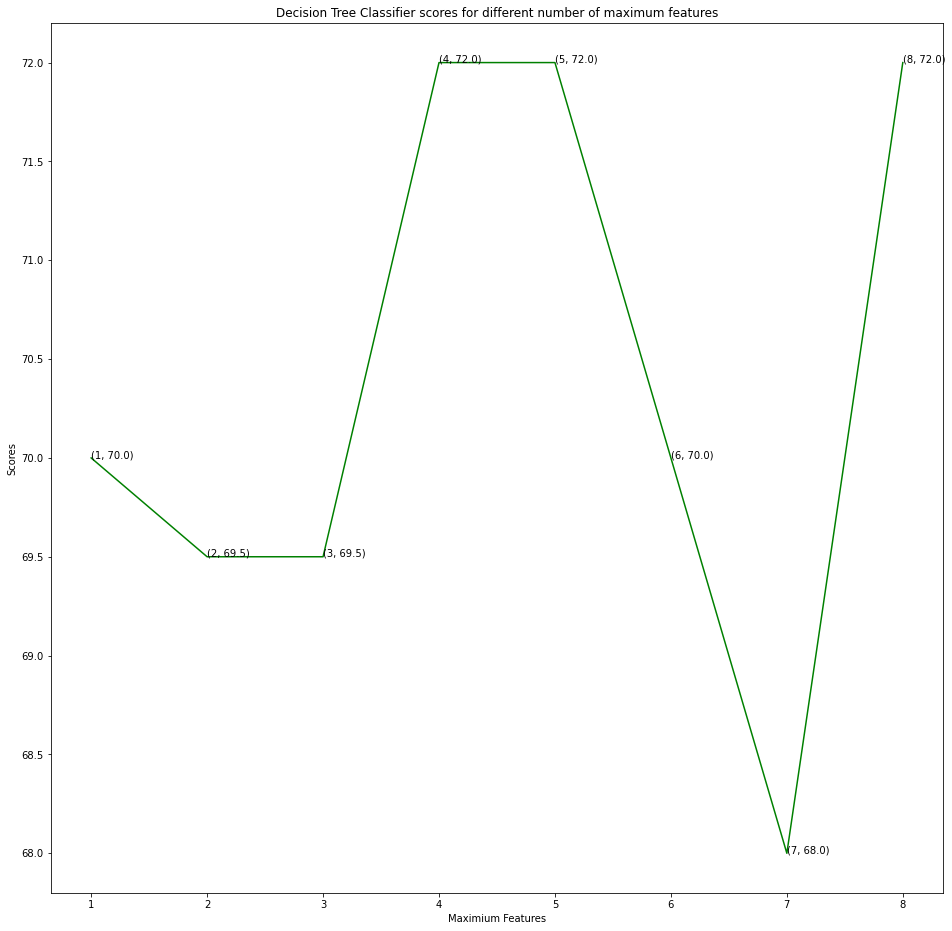

In [ ]:
plt.plot([i for i in range(1, len(x.columns) + 1)], decision_tree_score_lst, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text( i, decision_tree_score_lst[i-1], ( i, decision_tree_score_lst[i-1]))
plt.title("Decision Tree Classifier scores for different number of maximum features")
plt.xlabel("Maximium Features")
plt.ylabel("Scores")
plt.xticks([i for i in range(1, len(x.columns) + 1)])

In [ ]:
#svm
svc_score_lst = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernels:
    svc_model = SVC(kernel = i)
    svc_model.fit(x_train, y_train)
    svc_score_lst.append(svc_model.score(x_test, y_test))

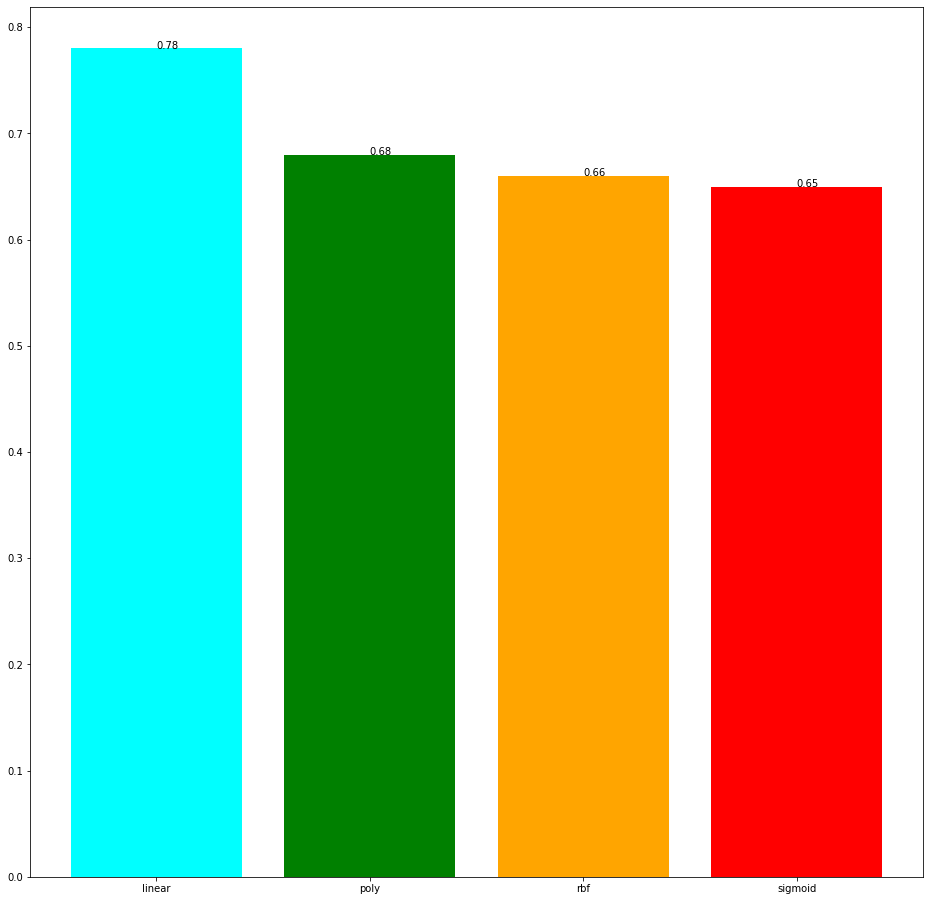

In [ ]:
plt.bar(kernels, svc_score_lst, color = ['cyan', 'green', 'orange', 'red'])
for i in range(len(kernels)):
    plt.text(i, svc_score_lst[i], round(svc_score_lst[i], 4))

In [ ]:
#Naive bayes

Nb_model = GaussianNB()

Nb_model.fit(x_train, y_train)

Nb_model.score(x_test, y_test)

0.795

**ACCURACY COMPARISON**

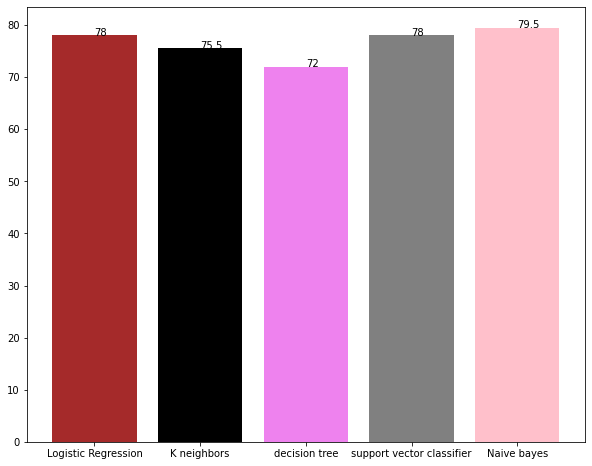

In [ ]:
rcParams['figure.figsize'] = 10,8
lst_x = ['Logistic Regression', 'K neighbors', 'decision tree', 'support vector classifier', 'Naive bayes']
lst_y = [ 78, 75.5, 72, 78, 79.5 ]
plt.bar(lst_x, lst_y, color = ['brown', 'black', 'violet', 'grey', 'pink'])
for i in range(len(lst_y)):
    plt.text(i, lst_y[i], lst_y[i])

*CLEARLY NAIVE BAYES SHOW THE BEST RESULT*